# Project: Data Wrangling 

## Table of Contents
<ul>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Data Assessment</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#store">Data Storing</a></li>
<li><a href="#analyse">Analyzing and Visualizing Datat</a></li>
</ul>

<a id='gather'></a>
## Data Gathering

In [1]:
!pip install tweepy

In [84]:
#load modules
import numpy as np
import pandas as pd
import glob
import json
%matplotlib inline
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [3]:
#load twitter archived data
df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#load Image prediction data
df_img_data = pd.read_csv('image-predictions-3.tsv', sep='\t')

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [6]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
# load data pulled from twitter api
tweet_file = glob.glob('tweet-json.txt')

In [9]:
# convert data to dataframe
tweet_list = []
with open(tweet_file[0], encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        tweet_obj = json.loads(line)
        tweet_id = tweet_obj['id']
        retweet_count = tweet_obj['retweet_count']
        favorite_count = tweet_obj['favorite_count']

        tweet_list.append({'tweet_id': tweet_id,
                        'retweet': retweet_count,
                        'favorite': favorite_count})
print(len(tweet_list))

2354


In [10]:
df_tweet = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet', 'favorite'])


In [ ]:
#save to dataframe
df_tweet.to_csv('twitter_data.csv', index=False)

<a id ='assess'></a>
## Data Assessment

**Visual Assessment of the data** - manually going through the data to determine issues that may exist

In [11]:
#visually assess df table to identify possible quality and tidiness issues
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
#visually assess df_img_data table to identify possible quality and tidiness issues
df_img_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
#visually assess df_tweet table to identify possible quality and tidiness issues
df_tweet

,tweet_id,retweet,favorite
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


**Programmatic Assessment**

> Further assesment of the datasets using pandas methods to identify possible data quality and tidiness issues

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> Some columns have missing values

In [15]:
# programatically assessing the name column
df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [17]:
pd.set_option('display.max_rows', None)
df.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Daisy               7
Buddy               7
Toby                7
an                  7
Bailey              7
Leo                 6
Oscar               6
Stanley             6
Rusty               6
Bella               6
Dave                6
Jack                6
Koda                6
Scout               6
Jax                 6
Milo                6
Louis               5
Phil                5
Sammy               5
Gus                 5
Chester             5
Alfie               5
Sunny               5
Bentley             5
very                5
Oakley              5
Finn                5
George              5
Larry               5
Clarence            4
Loki                4
Walter              4
Reggie    

> During extractions some name ['such', 'quite', 'this', 'unacceptable','all', 'Bookstore', 'infuriating', 'the', 'an'] were incorrectly pulled as dog names

In [18]:
df_img_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2354 non-null   int64
 1   retweet   2354 non-null   int64
 2   favorite  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [20]:
#check for duplicates in all dataframes
sum(df.duplicated()), sum(df_img_data.duplicated()), sum(df_tweet.duplicated())

(0, 0, 0)

In [21]:
# check for duplicated columns
all_columns = pd.Series(list(df) + list(df_img_data) + list(df_tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

the tweet_id column is duplicated in the `df_img_data` and `df_tweet` tables 

In [22]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> The minimum rating_denominator is 0. This is invalid data representation as it is possible to have a dog rated as 0/10 but vary unusual to have a zero denominator. 

Let's take a closer look

In [23]:
pd.set_option('display.max_colwidth', None)
df[df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


> Looking at this record we see that there are 2 representation of a fractions (960/00 & 13/10) values for numerator and denomenator we incorrectly inputed as they should be 13 / 10 respectively.

Let's also take a look at the records where numerator = 0 to rule out any improper representations

In [24]:
df[df['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


> All Good!!!!!

> In order to meet the project specifications "*You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets*" we need to remove all retweets.

We need to check for retweete using the by identifying records that have a retweeted_status_id. We see that each of the text in this category have a leading string "**RT**" 

In [25]:
df[df['retweeted_status_id'].isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [26]:
reply = df[df['in_reply_to_user_id'].isnull()==False]

In [ ]:
reply

In [68]:
df_img_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [69]:
df_tweet.describe()

,tweet_id,retweet,favorite
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


After assessment the following issues were uncovered 

***Quality***

* [X] contain retweets records 
* [X] tweet_id is not string
* [X] Irrelevant columns `retweeted_status_id` and `retweeted_status_user_id`, `in_reply_to_status_id`, `in_reply_to_user_id`
* [X] timestamp is a string not datetime
* [X] column `dog_breed` based on image prediction 
* [X] misrepresentation of NAN as none in `name`, `dog_breed`
* [X] Naming issues( for id-666411507551481857 name should be NAN not 'such', 'quite', 'this', 'unacceptable','all', 'Bookstore', 'infuriating')
* [X] replace nondescriptive name


***Tidiness***
* [X] retweet and favourite should be part of df table and all 3 tables should be one
* [X] doggo, floofer, pupper and puppo should be one column `dog_stage`

<a id='clean'></a>
## Data Cleaning


In this section all issues both Quality and Tidiness will be addressed 

Copies of the 3 data to be cleaned will be created. This data copies will be cleaned instead of the original data. This ensures that a backup is available

In [28]:
# create copies
df_clean = df.copy()

df_img_clean = df_img_data.copy()

df_tweet_clean = df_tweet.copy()

### Tidiness

**Define: `Tidiness 1`**

* merge `df`, `df_tweet`, and `df_img_data` into `tweets_df`

**Code**

In [29]:
#merge on these dataframe using the tweet_id 
tweets_df = pd.merge(pd.merge(df_clean, df_tweet_clean, on ='tweet_id'), df_img_clean, on='tweet_id')

**test**

In [30]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

**Define: `Tidiness 2`**

* create a column that combines doggo, floofer, pupper and puppo into one column dog_stage

**Code**

In [31]:
# Extract the text from the columns into the new dog_stage column
tweets_df['dog_stage'] = tweets_df['text'].str.extract('(doggo|floofer|pupper|puppo)')

**Test**

In [32]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

In [33]:
tweets_df[tweets_df['dog_stage'].isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,...,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135344209921/photo/1,...,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,puppo
28,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/886366144734445568/photo/1,https://twitter.com/dog_rates/status/886366144734445568/photo/1",...,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True,pupper
38,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670584377345/photo/1,...,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,doggo
41,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690899218434/photo/1,...,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,floofer
44,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694511734784/photo/1,...,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True,pupper
49,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595344535552/photo/1,...,Saluki,0.529012,True,Afghan_hound,0.250003,True,golden_retriever,0.160739,True,pupper
50,881

### **Quality**

#### 1. Define 
* `tweets_df` : remove records that are retweets

#### Code

In [34]:
# get index of records that correspond to retweets
tweets_df[tweets_df['retweeted_status_id'].isnull()==False].index

Int64Index([  32,   67,   81,  109,  129,  133,  170,  171,  186,  209,  215,
             226,  229,  238,  263,  269,  270,  284,  318,  327,  331,  337,
             346,  355,  356,  361,  370,  374,  380,  390,  421,  428,  433,
             437,  439,  446,  449,  454,  458,  468,  472,  479,  480,  481,
             482,  483,  484,  485,  494,  502,  504,  509,  532,  535,  551,
             563,  578,  586,  597,  598,  610,  617,  620,  627,  646,  656,
             665,  685,  704,  708,  723,  727,  739,  742,  757,  775, 1035,
            1977, 1978],
           dtype='int64')

In [35]:
# remove records that correspond to retweets
tweets_df.drop(tweets_df[tweets_df['retweeted_status_id'].isnull()==False].index, inplace = True)


In [ ]:
# remove columns that correspond to retweets
tweets_df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

**Test**

In [ ]:
tweets_df.info()

**2. Define**

* `tweets_df`: Drop irrelevant columns
> [doggo', 'pupper', 'puppo' and 'flopper' 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'] 

**Code**

In [36]:
# remove irrelevant columns 
tweets_df.drop(['doggo', 'pupper', 'puppo', 'floofer', 'retweeted_status_id','retweeted_status_user_id',
                'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

**test**

In [37]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   retweet             1994 non-null   int64  
 9   favorite            1994 non-null   int64  
 10  jpg_url             1994 non-null   object 
 11  img_num             1994 non-null   int64  
 12  p1                  1994 non-null   object 
 13  p1_conf             1994 non-null   float64
 14  p1_dog              1994 non-null   bool   
 15  p2                  1994 non-null   object 
 16  p2_con

**3. Define**
* `tweets_df` - correct naming issue with various entries    
>* ID-887517139158093824 incorrect name 'such' should be NAN, 
>* ID-666411507551481857 name should be NAN not quite
>* 'this', 'unacceptable','all', 'infuriating'

In [38]:
#let's take a look at this record
# incorrect name == quite
tweets_df[tweets_df['tweet_id'] == 666411507551481857]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
2043,666411507551481857,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t,https://twitter.com/dog_rates/status/666411507551481857/photo/1,2,10,quite,339,459,...,coho,0.40464,False,barracouta,0.271485,False,gar,0.189945,False,NaN


In [39]:
tweets_df.loc[tweets_df['name']=='quite']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
141,859196978902773760,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,25661,75193,...,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,0.128383,False,NaN
155,855459453768019968,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x","https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,8987,31657,...,Blenheim_spaniel,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,0.082628,True,NaN
2043,666411507551481857,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t,https://twitter.com/dog_rates/status/666411507551481857/photo/1,2,10,quite,339,459,...,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False,NaN


> we discover that there are more records with the same inaccuracy

In [40]:
# incorrect name == such should be NaN 
# let's view this record
tweets_df.loc[tweets_df['name']=='such']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
21,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,12082,46959,...,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,NaN


In [41]:
# incorrect name == all should be NaN
# let's view this record
tweets_df.loc[tweets_df['name']=='all']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
942,728035342121635841,2016-05-05 01:35:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is all I want in my life. 12/10 for super sleepy pupper https://t.co/4RlLA5ObMh,"https://twitter.com/dog_rates/status/728035342121635841/photo/1,https://twitter.com/dog_rates/status/728035342121635841/photo/1",12,10,all,1872,4953,...,handkerchief,0.302961,False,Pomeranian,0.248664,True,Shih-Tzu,0.111015,True,pupper


In [43]:
# incorrect name == infuriating should be NaN
# let's view this record
tweets_df.loc[tweets_df['name']=='infuriating']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
1050,710272297844797440,2016-03-17 01:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2,https://twitter.com/dog_rates/status/710272297844797440/photo/1,11,10,infuriating,1425,4945,...,Old_English_sheepdog,0.586307,True,wire-haired_fox_terrier,0.118622,True,Lakeland_terrier,0.106806,True,NaN


In [44]:
# incorrect name == unacceptable should be NaN
# let's view this record
tweets_df.loc[tweets_df['name']=='unacceptable']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
925,730924654643314689,2016-05-13 00:56:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Pls stop sending non-canines like this Bulgarian Eyeless Porch Bear. This is unacceptable... 9/10 https://t.co/2yctWAUZ3Z,https://twitter.com/dog_rates/status/730924654643314689/photo/1,9,10,unacceptable,2234,6682,...,polecat,0.185382,False,mink,0.105282,False,Newfoundland,0.086241,True,NaN


**Code**

In [45]:
tweets_df['name'] = tweets_df['name'].str.replace('quite','NaN')

In [46]:
tweets_df['name'] = tweets_df['name'].str.replace('all','NaN')

In [47]:
tweets_df['name'] = tweets_df['name'].str.replace('infuriating','NaN')

In [48]:
tweets_df['name'] = tweets_df['name'].str.replace('unacceptable','NaN')

In [49]:
tweets_df['name'] = tweets_df['name'].str.replace('such','NaN')

**test**

In [50]:
tweets_df.loc[tweets_df['name']=='quite']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


In [51]:
tweets_df[tweets_df['tweet_id'] == 859196978902773760]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
141,859196978902773760,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,NaN,25661,75193,...,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,0.128383,False,NaN


In [52]:
tweets_df[tweets_df['tweet_id'] == 887517139158093824]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
21,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,NaN,12082,46959,...,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,NaN


In [53]:
tweets_df.loc[tweets_df['name']=='such']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


In [54]:
tweets_df.loc[tweets_df['name']=='all']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


In [55]:
tweets_df.loc[tweets_df['name']=='unacceptable']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


In [56]:
tweets_df.loc[tweets_df['name']=='infuriating']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


**4. Define**
>* convert the `timestamp` column to datetime format


**Code**

In [57]:
# convert the 'timestamp' column to datetime format
tweets_df['timestamp']= pd.to_datetime(tweets_df['timestamp'])

**Test**

In [58]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   retweet             1994 non-null   int64              
 9   favorite            1994 non-null   int64              
 10  jpg_url             1994 non-null   object             
 11  img_num             1994 non-null   int64              
 12  p1                  1994 non-null 

##### **5. Define**
>* convert the 'tweet_id' column to string


**Code**

In [59]:
tweets_df['tweet_id'] = tweets_df['tweet_id'].astype(str)

**Test**

In [60]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   retweet             1994 non-null   int64              
 9   favorite            1994 non-null   int64              
 10  jpg_url             1994 non-null   object             
 11  img_num             1994 non-null   int64              
 12  p1                  1994 non-null 

**6. Define**

>* Create a new column for dog breed

In [61]:
tweets_df.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,8853,39467,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,6514,33819,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,4328,25461,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,8964,42908,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,9774,41048,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


**Code**

In [62]:
tweets_df['dog_breed'] = 'None'
for i, row in tweets_df.iterrows():
    cf_level = -1
    dog_breed = ''
    if (row.p1_dog and (row.p1_conf > cf_level)):
        cf_level = row.p1_conf
        dog_breed = row.p1
    if (row.p2_dog and (row.p2_conf > cf_level)):
        cf_level = row.p2_conf
        dog_breed = row.p2
    if (row.p3_dog and (row.p3_conf > cf_level)):
        cf_level = row.p3_conf
        dog_breed = row.p3
    
    if len(dog_breed) > 0:
        tweets_df.at[i, 'dog_breed']= dog_breed

**test**

In [63]:
tweets_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,8853,39467,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,6514,33819,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,4328,25461,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,8964,42908,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,9774,41048,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,basset


**7. Define**
> Misrepresentation of NAN as none in `dog_breed`, `name`


In [64]:
tweets_df[tweets_df.dog_breed == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,8853,39467,...,0.097049,False,bagel,8.585110e-02,False,banana,7.611000e-02,False,NaN,None
21,887517139158093824,2017-07-19 03:39:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,NaN,12082,46959,...,0.130432,False,tow_truck,2.917540e-02,False,shopping_cart,2.632080e-02,False,NaN,None
27,886680336477933568,2017-07-16 20:14:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Derek. He's late for a dog meeting. 13/10 pet...al to the metal https://t.co/BCoWue0abA,https://twitter.com/dog_rates/status/886680336477933568/photo/1,13,10,Derek,4610,22798,...,0.738995,False,sports_car,1.399520e-01,False,car_wheel,4.417270e-02,False,NaN,None
51,881268444196462592,2017-07-01 21:49:04+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Elliot. He's a Canadian Forrest Pup. Unusual number of antlers for a dog. Sneaky tongue slip to celebrate #Canada150. 12/10 would pet https://t.co/cgwJwowTMC,https://twitter.com/dog_rates/status/881268444196462592/photo/1,12,10,Elliot,5358,23501,...,0.473303,False,Indian_elephant,2.456460e-01,False,ibex,5.566070e-02,False,NaN,None
52,880935762899988482,2017-06-30 23:47:07+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Louis. He's crossing. It's a big deal. 13/10 h*ckin breathtaking https://t.co/D0wb1GlKAt,https://twitter.com/dog_rates/status/880935762899988482/photo/1,13,10,Louis,2886,17346,...,0.251801,False,umbrella,1.151230e-01,False,traffic_light,6.953380e-02,False,NaN,None
61,879050749262655488,2017-06-25 18:56:45+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Steven. He has trouble relating to other dogs. Quite shy. Neck longer than average. Tropical probably. 11/10 would still pet https://t.co/2mJCDEJWdD,https://twitter.com/dog_rates/status/879050749262655488/photo/1,11,10,Steven,4941,23022,...,0.311861,False,window_screen,1.691230e-01,False,Egyptian_cat,1.329320e-01,False,NaN,None
94,870804317367881728,2017-06-03 00:48:22+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Real funny guys. Sending in a pic without a dog in it. Hilarious. We'll rate the rug tho because it's giving off a very good vibe. 11/10 https://t.co/GCD1JccCyi,https://twitter.com/dog_rates/status/870804317367881728/photo/1,11,10,None,6393,33791,...,0.168290,False,sandbar,9.804040e-02,False,television,7.972940e-02,False,NaN,None
98,870063196459192321,2017-05-31 23:43:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Clifford. He's quite large. Also red. Good w kids. Somehow never steps on them. Massive poops very inconvenient. Still 14/10 would ride https://t.co/apVOyDgOju,"https://twitter.com/dog_rates/status/870063196459192321/photo/1,https://twitter.com/dog_rates/status/870063196459192321/photo/1",14,10,Clifford,8840,37771,...,0.534409,False,envelope,2.807220e-01,False,book_jacket,4.378550e-02,False,NaN,None
117,864873206498414592,2017-05-17 16:00:15+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please don't send in Je

In [86]:
tweets_df[tweets_df.name == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,prediction1_confidence_level,RequiredQualifications,Prediction2_is_dog,prediction2_confidence_level,Prediction2_is_dog,prediction3,prediction3_confidence_level,Prediction3_is_dog,dog_stage,dog_breed
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,3261,20562,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN,Chesapeake_Bay_retriever
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,16716,56848,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,NaN,Pomeranian
12,889665388333682689,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,8538,38818,...,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,puppo,Pembroke
23,887343217045368832,2017-07-18 16:08:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,10737,34222,...,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True,NaN,Mexican_hairless
24,887101392804085760,2017-07-18 00:07:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,6167,31061,...,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True,NaN,Samoyed
33,885167619883638784,2017-07-12 16:03:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,4556,22367,...,0.812482,True,Siberian_husky,0.071712,True,Eskimo_dog,0.055770,True,NaN,malamute
37,884441805382717440,2017-07-10 15:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",https://twitter.com/dog_rates/status/884441805382717440/photo/1,14,10,None,5856,27478,...,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True,NaN,Pembroke
42,883117836046086144,2017-07-07 00:17:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 wou

**Code**

In [65]:
tweets_df['dog_breed'] = tweets_df['dog_breed'].replace('None', np.nan)

In [87]:
tweets_df['name'] = tweets_df['name'].replace('None', np.nan)

**test**

In [66]:
tweets_df[tweets_df.dog_breed == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,dog_breed


In [88]:
tweets_df[tweets_df.name == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,prediction1_confidence_level,RequiredQualifications,Prediction2_is_dog,prediction2_confidence_level,Prediction2_is_dog,prediction3,prediction3_confidence_level,Prediction3_is_dog,dog_stage,dog_breed


**8. Define**
> Select all nondescriptive `(p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog)` and replace with descriptive ones `(prediction1, prediction1_confidence_level, Prediction1_is_dog, prediction2, prediction2_confidence_level, Prediction2_is_dog, prediction3, prediction3_confidence_level, Prediction3_is_dog)`

**Code**

In [75]:
tweets_df = tweets_df.rename(columns={'p1': 'prediction1',
                                    'p1_conf': 'prediction1_confidence_level',
                                   'p1_dog':'Prediction1_is_dog',
                                    'p2': 'prediction2',
                                    'p2_conf': 'prediction2_confidence_level',
                                   'p2_dog':'Prediction2_is_dog',
                                    'p3': 'prediction3',
                                    'p3_conf': 'prediction3_confidence_level',
                                   'p3_dog':'Prediction3_is_dog'
                                   })

**test**

In [76]:
tweets_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,prediction1_confidence_level,RequiredQualifications,Prediction2_is_dog,prediction2_confidence_level,Prediction2_is_dog,prediction3,prediction3_confidence_level,Prediction3_is_dog,dog_stage,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,8853,39467,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,6514,33819,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,4328,25461,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,8964,42908,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,9774,41048,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,basset


<a id = "store"></a>
## Data Storing

The gathered, assessed, and cleaned master dataset `tweets_df` is saved in to a CSV file

In [77]:
tweets_df.to_csv('twitter_archive_master_data.csv', index = False)

<a id = "analyse"></a>
## Analyzing and Visualizing Data

`Let's Explore our Master Data !!! `

In [78]:
# load master data for analysis
master_df = pd.read_csv('twitter_archive_master_data.csv')

In [79]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet,favorite,...,prediction1_confidence_level,RequiredQualifications,Prediction2_is_dog,prediction2_confidence_level,Prediction2_is_dog.1,prediction3,prediction3_confidence_level,Prediction3_is_dog,dog_stage,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,8853,39467,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,6514,33819,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,4328,25461,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,8964,42908,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,9774,41048,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,basset


In [80]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tweet_id                      1994 non-null   object             
 1   timestamp                     1994 non-null   datetime64[ns, UTC]
 2   source                        1994 non-null   object             
 3   text                          1994 non-null   object             
 4   expanded_urls                 1994 non-null   object             
 5   rating_numerator              1994 non-null   int64              
 6   rating_denominator            1994 non-null   int64              
 7   name                          1994 non-null   object             
 8   retweet                       1994 non-null   int64              
 9   favorite                      1994 non-null   int64              
 10  jpg_url                       1994 n

### Research Question 1 (How many breeds of dog do we have ?)

In [89]:
master_df['dog_breed'].unique()

array([nan, 'Chihuahua', 'Labrador_retriever', 'basset',
       'Chesapeake_Bay_retriever', 'Appenzeller', 'Pomeranian',
       'Irish_terrier', 'Pembroke', 'Samoyed', 'French_bulldog',
       'golden_retriever', 'whippet', 'Siberian_husky',
       'Mexican_hairless', 'kuvasz', 'pug', 'Blenheim_spaniel',
       'malamute', 'Italian_greyhound', 'chow', 'German_shepherd',
       'Doberman', 'Eskimo_dog', 'Weimaraner', 'Saluki',
       'miniature_pinscher', 'German_short-haired_pointer',
       'English_springer', 'vizsla', 'bloodhound', 'Bernese_mountain_dog',
       'West_Highland_white_terrier', 'cocker_spaniel',
       'flat-coated_retriever', 'Cardigan', 'Newfoundland',
       'Shetland_sheepdog', 'komondor', 'kelpie',
       'Greater_Swiss_Mountain_dog', 'Border_collie', 'bull_mastiff',
       'Staffordshire_bullterrier', 'Lakeland_terrier',
       'Australian_terrier', 'Bouvier_des_Flandres', 'Bedlington_terrier',
       'Boston_bull', 'Old_English_sheepdog', 'black-and-tan_coonhou

In [90]:
(tweets_df['dog_breed'][1:]).nunique()

113

> *There are `113` unique breed of dogs*

### Research Question 2 (Which breed of dogs have the highest retweets ?)

In [92]:
breed_with_highest_retweet = master_df.groupby(['dog_breed'])['retweet'].sum().sort_values(ascending=False)

In [93]:
breed_with_highest_retweet

dog_breed
golden_retriever                  587528
Labrador_retriever                407573
Pembroke                          292052
Chihuahua                         251807
Samoyed                           203446
French_bulldog                    156230
cocker_spaniel                    145743
chow                              131025
pug                               118682
toy_poodle                        115768
Pomeranian                        112171
malamute                          102515
Eskimo_dog                         93183
Chesapeake_Bay_retriever           81730
Cardigan                           79765
Lakeland_terrier                   73488
Great_Pyrenees                     68008
standard_poodle                    60598
miniature_pinscher                 57728
German_shepherd                    56205
English_springer                   54016
whippet                            53243
basset                             49563
Staffordshire_bullterrier          48253
Shetla

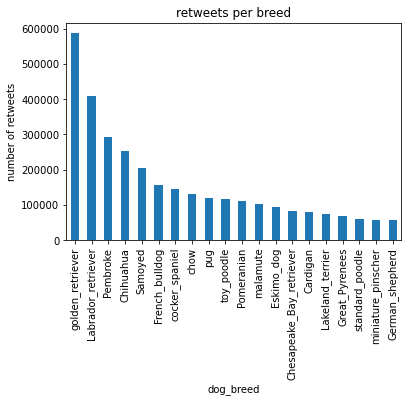

In [96]:
breed_with_highest_retweet[:20].plot(kind='bar')
plt.title('retweets per breed')
plt.ylabel('number of retweets')
plt.show()

> *We see that post with `golden_retriever` has the highest retweets*

### Research Question 3 (Which breed of dogs is people's favourite ?)

In [97]:
people_favourite = master_df.groupby(['dog_breed'])['favorite'].sum().sort_values(ascending=False)

In [98]:
people_favourite

dog_breed
golden_retriever                  1946934
Labrador_retriever                1274526
Pembroke                          1039484
Chihuahua                          746604
Samoyed                            583906
French_bulldog                     570921
chow                               446933
cocker_spaniel                     407412
pug                                383817
toy_poodle                         339068
malamute                           332859
Pomeranian                         312957
Chesapeake_Bay_retriever           302246
Cardigan                           269644
Eskimo_dog                         235104
German_shepherd                    217469
Lakeland_terrier                   212288
miniature_pinscher                 203242
basset                             199955
Staffordshire_bullterrier          191924
Great_Pyrenees                     186847
Shetland_sheepdog                  169291
standard_poodle                    153041
American_Staffordshire_t

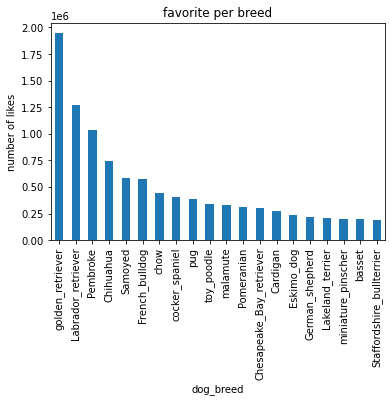

In [100]:
people_favourite[:20].plot(kind='bar')
plt.ylabel('number of likes')
plt.title('favorite per breed')
plt.show()

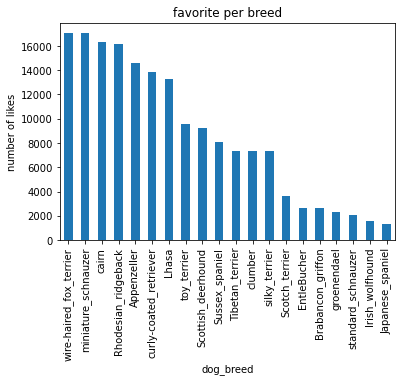

In [105]:
people_favourite[-20:].plot(kind='bar')
plt.ylabel('number of likes')
plt.title('favorite per breed')
plt.show()

> *We also see that the `golden_retriever` is people's favorite breed* and `Japanese_spaniel` as the least favourite

### Research Question 4 (what stage of the dog do people find most adorable ?)

In [108]:
number_of_retweet_per_stage = master_df.groupby(['dog_stage'])['favorite'].count().sort_values(ascending=False)

In [109]:
master_df.groupby(['dog_stage'])['favorite'].count().sort_values(ascending=False)/sum(number_of_retweet_per_stage)

dog_stage
pupper     0.684049
doggo      0.220859
puppo      0.085890
floofer    0.009202
Name: favorite, dtype: float64

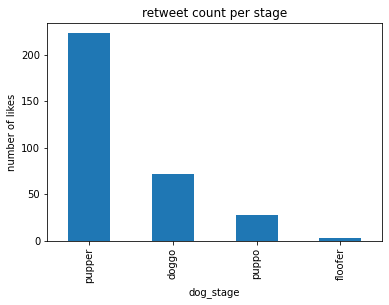

In [110]:
number_of_retweet_per_stage.plot(kind='bar')
plt.title('retweet count per stage')
plt.ylabel('number of likes')
plt.show()

> *People find `puppers` most adorable*